# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [34]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [35]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape)  # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

In [36]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(A)
print('--------------------')
rows = [0, 2]
columns = [1, 3]
print(A[rows, columns])
print('--------------------')
print(A[np.ix_(rows, columns)])


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
--------------------
[ 2 12]
--------------------
[[ 2  4]
 [10 12]]


*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

In [37]:
A = np.array([[1, 0], [0, 0]])
print(np.exp(A))

[[2.71828183 1.        ]
 [1.         1.        ]]


Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

In [38]:
A = np.array([[1, 0], [1, 1]])
print(sla.inv(A))

[[ 1. -0.]
 [-1.  1.]]


**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

1. создайте нулевую матрицу $Z$ размера $3\times4$;

2. создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

3. найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

4. найдите обратную к ней матрицу;

5. сгенерируйте случайную матрицу $X$ размера $4\times5$;

6. найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

7. найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [39]:
# 1
A = np.zeros((3, 4))
print(A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [40]:
# 2
A = np.diag([1, 2, 3, 4, 5])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [41]:
# 3
print(np.trace(A))

15


In [42]:
# 4
print(sla.inv(A))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [43]:
# 5
X = np.random.rand(4, 5)
print(X)

[[0.81280148 0.67397366 0.05349021 0.58815914 0.92658651]
 [0.20250512 0.65067738 0.48155887 0.67900053 0.26727059]
 [0.52271957 0.92107738 0.02476425 0.7889261  0.85475708]
 [0.60032199 0.32067853 0.69958071 0.77659536 0.26153487]]


In [44]:
# 6
X1 = X[np.ix_((1, 2), (0, 1))]
# print(X1)
print(sla.det(X1))

-0.15359891180243898


In [45]:
# 7
print(X.T @ X)

[[1.33527681 1.35354784 0.57391351 1.49415209 1.41105794]
 [1.35354784 1.8288398  0.59654077 1.8139135  1.66956786]
 [0.57391351 0.59654077 0.72478659 0.92126779 0.382402  ]
 [1.49415209 1.8139135  0.92126779 2.03247764 1.60390413]
 [1.41105794 1.66956786 0.382402   1.60390413 1.72900628]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [46]:
# from mpmath import *


def my_det(X):
    n = X.shape[0]
    X1 = np.array(X, dtype='longdouble').copy()
    # X1 = X.copy()
    # X1 = X.copy()
    det2 = [1]

    if X1.shape[0] != X1.shape[1]:
        raise ValueError
    else:
        def make_zeros_under_lead(i, j, det1):
            # делаем ведущий элемент единичкой (делим на него всю строку)
            lead_el = X1[i][j]
            X1[i] = X1[i] / lead_el
            det1[0] *= lead_el
            # вычитаем эту строку, домноженную на нижние элементы под главным, из соответствующих строк
            for r in range(i + 1, n):
                cur_el_under_lead = X1[r][j]
                X1[r] = X1[r] - cur_el_under_lead * X1[i]

        # def make_zeros_above_lead(i, j):  # номер строки, в которой ведущий элемент + номер столбца
        #     for r in range(0,
        #                    i):  # вычитаем эту строку, домноженную на нижние элементы под главным, из соответствующих строк
        #         cur_el_above_lead = X1[r][j]
        #         X1[r] = X1[r] - cur_el_above_lead * X1[i]

        # поиск строки, в которой ненулевой элемент + обмен с самой верхней
        def non_zero_str_search(last_non_zero_col, det1):  # non_zero = -1
            for i in range(last_non_zero_col + 1, n):
                # print((i, X1[i][last_non_zero_col + 1]))
                if X1[i][last_non_zero_col + 1] != 0:
                    X1[i], X1[last_non_zero_col + 1] = X1[last_non_zero_col + 1], X1[i].copy()
                    if i != last_non_zero_col + 1:  # проверка, что строки надо действительно менять
                        det1[0] *= (-1)
                    return 1
            else:
                return 0

        # приводим к верхнетреугольному виду
        for k in range(n):
            f = non_zero_str_search(k - 1, det2)
            if not f:  # найден нулевой столбец -> определитель = 0
                return 0
            make_zeros_under_lead(k, k, det2)

        # # приводим к диагональному виду (можно не приводить)
        # for k in range(n):
        #     make_zeros_above_lead(k, k)

        det = det2[0]
        return det

Простая проверка:

In [47]:
# Запустите этот блок кода
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
print(my_det(X))
# print(X.shape)

-1.0


In [48]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X)  - sla.det(X)) > 1e-6:
        print('FAILED')

In [49]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    # print(X)
    # print(my_det(X))
    # print(X)
    # print(sla.det(X))
    # print()
    a = my_det(X)
    b = sla.det(X)
    if np.abs(a - b) > 1e-6:
        print('FAILED')
        print(a)
        print(b)

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

18 µs ± 2.49 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
213 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
206 µs ± 6.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.5 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.6 ms ± 678 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.95 s ± 359 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


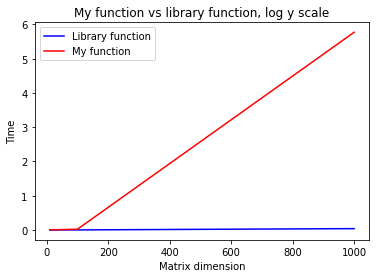

In [50]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

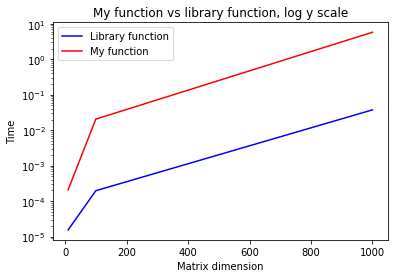

In [51]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [52]:
A = np.array([[1, 0], [10 ** 20, 1]])
B = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
print(A @ B)
C = np.array([[1., 0.], [10. ** 20, 1.]])
D = np.array([[10. ** (-20), 1.], [0., 1. - 10 ** 20]])
print(C @ D)


[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**1ый**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [53]:
def my_pascal(dim):
    P = np.zeros((dim, dim), dtype=np.float64)  # нужно менять тип?????????????
    P[0] = np.ones((1, dim))
    P[:, 0:1] = np.ones((1, dim)).T
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i][j - 1] + P[i - 1][j]
    return P


print(my_pascal(5))


[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


Чему равен её определитель? **Строго** поясните свой ответ.



Матрица Паскаля - та, элементами которой являются биномиальные коэффициенты.
Рассмотрим матрицу Паскаля P. Заметим, что она может быть представлена в виде произведения двух других. Таких, что:

\begin{gather*}
$A_{ij}$ = $C_{i}^j$\\
$B_{ij}$ = $C_{j}^i$\\
$A^{T} = B$
\end{gather*}


\begin{gather*}
A (нижнетреугольная) =
\begin{pmatrix}
$C_{0}^0$ & 0 & 0 & \ldots & 0 \\
$C_{1}^0$ & $C_{1}^1$ & 0 & \ldots & 0\\
$C_{2}^0$ & $C_{2}^1$ & $C_{2}^2$ & \ldots & 0 \\
\vdots &\vdots &\vdots & \ddots & \vdots \\
$C_{n - 1}^0$ & $C_{n - 1}^1$ & $C_{n - 1}^2$ &\ldots & $C_{n - 1}^{n - 1}$
\end{pmatrix}
\end{gather*}

\begin{gather*}
B (верхнетреугольная) =
\begin{pmatrix}
$C_{0}^0$ & $C_{1}^0$ & $C_{2}^0$ &\ldots & $C_{n - 1}^0$\\
0 & $C_{1}^1$ & $C_{2}^1$ & \ldots & $C_{n - 1}^1$ \\
0 & 0 & $C_{2}^2$ & \ldots & $C_{n - 1}^2$ \\
\vdots &\vdots &\vdots & \ddots & \vdots\\
0 & 0 & 0 &\ldots & $C_{n - 1}^{n - 1}$
\end{pmatrix}
\end{gather*}



\begin{gather*}
P =
\begin{pmatrix}
$C_{0}^0$ & $C_{1}^0$ & $C_{2}^0$ & $C_{3}^0$ & $C_{4}^0$ & $C_{5}^0$ & \ldots & $C_{n-1}^0$\\
$C_{1}^1$ & $C_{2}^1$ & $C_{3}^1$ & $C_{4}^1 & $C_{5}^1 & \ldots \\
$C_{2}^2$ & $C_{3}^2$ & $C_{4}^2$ & $C_{5}^2 & \ldots \\
$C_{3}^3$ & $C_{4}^3$ & $C_{5}^3$ & \ldots \\
\vdots &\vdots &\vdots & \ddots & \vdots \\
$C_{n-1}^{n-1} $ & \ldots
\end{pmatrix}
=
\begin{pmatrix}
$C_{0}^0$ & 0 & 0 & \ldots & 0 \\
$C_{1}^0$ & $C_{1}^1$ & 0 & \ldots & 0\\
$C_{2}^0$ & $C_{2}^1$ & $C_{2}^2$ & \ldots & 0 \\
\vdots &\vdots &\vdots & \ddots & \vdots \\
$C_{n - 1}^0$ & $C_{n - 1}^1$ & $C_{n - 1}^2$ &\ldots & $C_{n - 1}^{n - 1}$
\end{pmatrix}
*
\begin{pmatrix}
$C_{0}^0$ & $C_{1}^0$ & $C_{2}^0$ &\ldots & $C_{n - 1}^0$\\
0 & $C_{1}^1$ & $C_{2}^1$ & \ldots & $C_{n - 1}^1$ \\
0 & 0 & $C_{2}^2$ & \ldots & $C_{n - 1}^2$ \\
\vdots &\vdots &\vdots & \ddots & \vdots\\
0 & 0 & 0 &\ldots & $C_{n - 1}^{n - 1}$
\end{pmatrix}
\end{gather*}

Более того, на главной диагонали в обеих матрицах A и B стоят единицы ($C_{k}^k$ = 1)

**Докажем это:**
Для того чтобы матрицы были равны, необходимо, чтобы они поэлементно совпадали. То есть, достаточно показать, что $P_{ij}$ = $A_{(i)}$ * $B^{(j)}$

\begin{gather*}
$P_{ij}$ = $C_{i + j}^{i}$
\end{gather*}

\begin{gather*}
$A_{(i)}$ * $B^{(j)}$ = \sum_{k = 0}^{n - 1}$A_{ik}$ * $B_{kj}$ = \sum_{k = 0}^{n - 1}$A_{ik}$ * $A_{jk}$ = \sum_{k = 0}^{n - 1}$C_{i}^{k}$ * $C_{j}^{k}$\ \quad
\end{gather*}


Допустим, у нас есть i+j объектов и нам нужно определить, сколькими способами мы можем выбрать из них i.
Задачу можно разделить: нужно выбрать ($i - k$ объектов из $i$) и ($k$ объектов из $j$). Таким образом, действительно получится $i - k + k = i$ объектов выбираем из $i + j$.
Отметим, что ненулевые слагаемые в сумме получатся только в том случае, когда $i >= k$ и $j >= k$. То есть суммировать нужно по $k <= min(i, j)$
Тогда по правилу произведения.

$$C_{i + j}^{i}$ = \sum_{k = 0}^{n - 1}$C_{i}^{i - k}$ * $C_{j}^{k} = \sum_{k = 0}^{min(i, j)}$C_{i}^{i - k}$ * $C_{j}^{k}$ = \sum_{k = 0}^{min(i, j)}$C_{i}^{k}$ * $C_{j}^{k}$$


Что и требовалось доказать.


A, B - нижнетреугольная и верхнетреугольная матрицы соответственно. А значит, определитель каждой из них равен произведению элементов на главной диагонали. Получаем:

$$det P = det (A * B) = det A * det B = 1 * 1 = 1$$

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [54]:
print(sla.det(my_pascal(30)))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [55]:
def prod_and_sq_sum(A):
    n = A.shape[0]
    V = np.diag(X)
    prod1 = np.prod(V)
    V1 = V ** 2
    sum1 = np.sum(V1)
    return prod1, sum1


def check(A):
    n = A.shape[0]
    a = 1
    for i in range(n):
        a *= A[i][i]
    b = sum([X[i][i] * X[i][i] for i in range(n)])
    return a, b


# матрица с целыми числами
X = np.random.randint(-10, 10, (5, 5))
print(X)
print(prod_and_sq_sum(X))
print(check(X))


[[  1  -3   7  -8  -5]
 [  4 -10   2  -7  -1]
 [  7   3   6   5   6]
 [ -7   0   0  -5   8]
 [ -6 -10  -3  -1   3]]
(900, 171)
(900, 171)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [56]:
# def f2(A, B, lmbd, k):
#     n = A.shape[1]
#     m = A.shape[0]
#     ans = np.zeros((m, m))
#     for i in range(0, min(k, n)):
#         a = A[:, i:i + 1] * lmbd
#         # print(a)
#         b = B[:, i:i + 1].T
#         # print(b)
#         ans = ans + a @ b
#     return ans
#

def f(A, B, lmbd, k):
    n = A.shape[1]
    m = A.shape[0]
    ans = np.zeros((m, m))
    X = A.copy()
    X = X * lmbd
    Y = B.copy().T
    ans = X @ Y
    return ans

A1 = np.random.randint(-10, 10, (3, 4))
B1 = np.random.randint(-10, 10, (3, 4))
# print(A1)
# print()
# print(B1)
# print()
# print(f2(A1, B1, 1, 4))
# print()
# print(A1)
# print()
# print(B1)
# print()
print(f(A1, B1, 1, 4))



[[ 46  29   0]
 [-16   9 -20]
 [ 38 -57   8]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [57]:
# def check(A, B):
#     return A @ B
#

def get_diag(A, B):
    B = B.T
    C = A * B
    return C.sum(axis=1)


A1 = np.random.randint(-10, 10, (4, 4))
B1 = np.random.randint(-10, 10, (4, 4))
print(get_diag(A1, B1))
# c = get_diag(A1, B1)
# print(type(c))
# print(check(A1, B1))

[ 66  27 -54  72]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [58]:
def shrink_rotate(x, a, coef=1., angle=0.):
    lenght_rotation = coef * (np.cos(angle) + np.sin(angle) * 1j)
    ans = (x - a) * lenght_rotation + a
    return ans
    # raise NotImplementedError()


def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return (shrink_rotate(x, a, coef, angle) - a).conjugate() + a
    # raise NotImplementedError()


def geometric_inverse(x:complex, a:complex, r):
    rot_ans = r ** 2 / (x - a)
    ans1 = rot_ans.conjugate()
    return ans1 + a
    # raise NotImplementedError()


print(shrink_rotate(1 + 1j, 0, 2))
print(shrink_rotate_conj(1 + 1j, 0, 2))
print(geometric_inverse(1 + 1j, 0, 2))

(2+2j)
(2-2j)
(2+2j)


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

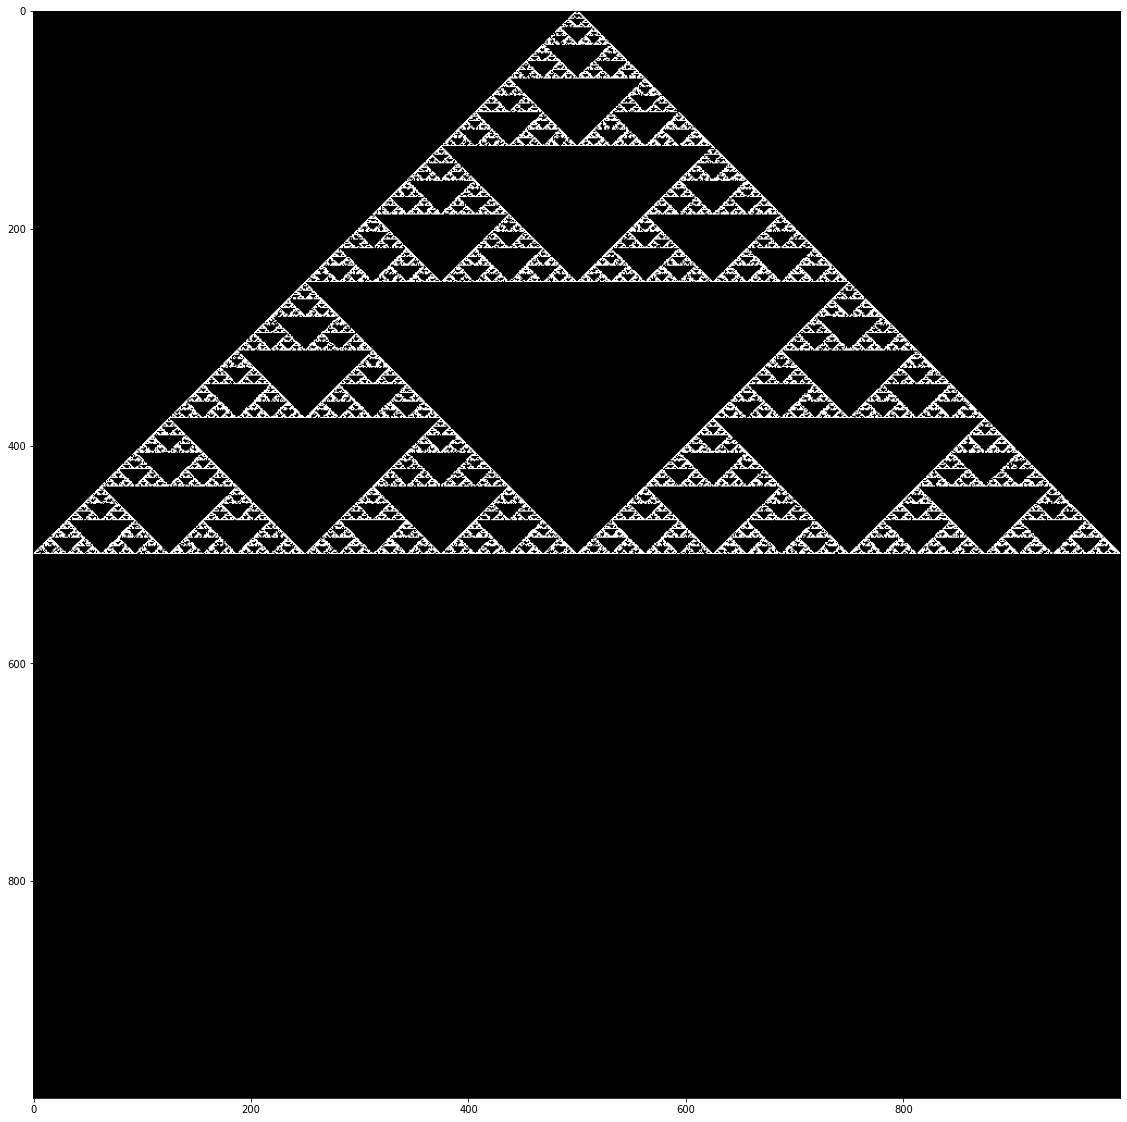

In [59]:
# from math import *
M = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        # print(z)
        M[int((1 - z.imag) * 500)][int((1 - z.real) * 500)] = 1


plt.figure(figsize=(20, 20))
plt.imshow(M, cmap='gray')
# plt.savefig('filename.png', dpi=300)

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

Координаты, задающие точку А, представляют из себя треугольник (если соединить эти три точки линиями). Поэтому при многократном повторении (случайном) откладывание влево/вверх/вправо сглаживается и распределяется равномерно, поэтому получается "треугольник рождается" на месте последней точки, а из-за рекуррентности формулы z, "последующие" треугольники повторяют "предыдущие", а поскольку коэффициент = 0.5, то треугольники с последующими итерациями начинают еще и сжиматься

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

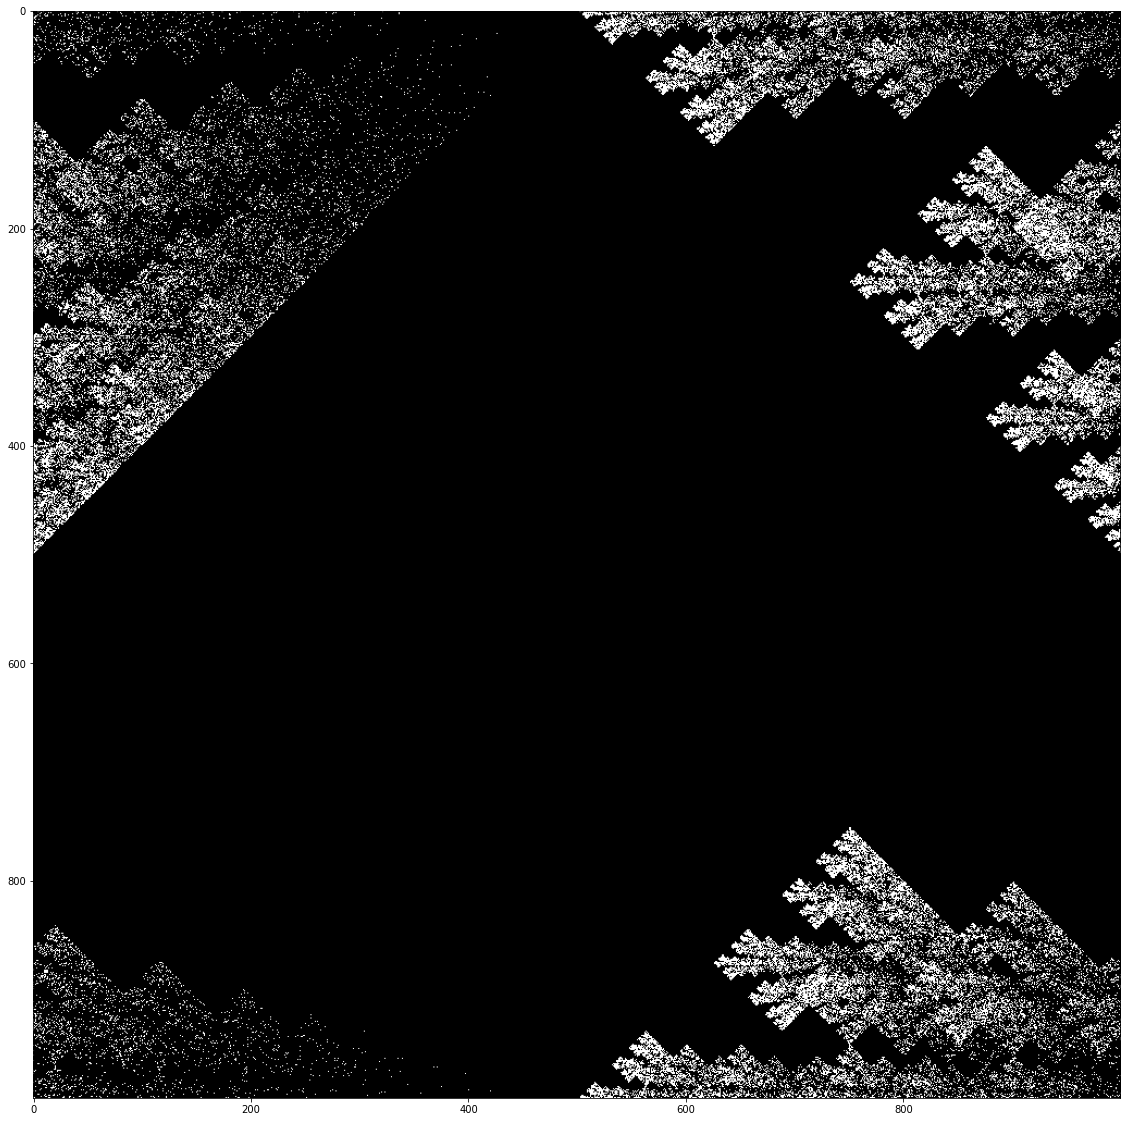

In [60]:
M = np.zeros((1000, 1000))
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.8, angle=0.)),
     (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 9:
        # print(z)
        M[int(z.imag * 500)][int(z.real * 500)] = 1


plt.figure(figsize=(20, 20))
plt.imshow(M, cmap='gray')
# plt.savefig('filename.png', dpi=300)

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [ ]:
# Your code here